In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

os.makedirs('../results', exist_ok=True)

with open('../data/brown_100.txt', 'r') as file_:
    corpus = file_.read()

def write_freqs(list_: list, filename: str) -> None:
    with open(f'../results/{filename}.txt', 'w') as file_:
        file_.write('\n'.join([' '.join(x[0]) + ' | ' + str(x[1]) for x in list_]))

## N-Gram Language Modeling
In the second assignment, you will implement an **n-gram language model** that processes input text to generate, analyze, and calculate the probabilities of sequences of `n` words (n-grams). This model will tokenize text, create n-grams, and compute their frequencies and probabilities, returning the most frequent n-grams in the text.

1. **Tokenization**: Convert the input text into a list of words (tokens).
2. **N-gram Generation**: Create sequences of `n` tokens from the text, treating each sentence independently with the inclusion of start (`<s>`) and end (`</s>`) markers.
3. **Frequency Counting**: Count how many times each n-gram appears in the text.
4. **Probability Calculation**: Compute the probabilities of each n-gram based on its frequency and add alpha smoothing to improve generalization of items.
5. **Most Frequent N-grams**: Return the most frequent n-grams along with their probabilities, helping to identify common patterns in the text.

In [2]:
from collections import Counter, defaultdict # You may import more from collections if needed

class NGramModel:
    def __init__(self, text, n, alpha=0.0):
        """
        Initialize the NGramModel with text and the value of n.
        """
        self.text = text
        self.n = n
        self.alpha = alpha  # for additive smoothing
        self.ngrams = {}
        self.probabilities = {}
        self.vocab = set()

    def tokenize(self) -> None:
        """
        Tokenize the text into words. 
        Fill in the code to split the text into a list of words.
        """
        tokens = []
        for line in self.text.splitlines():
            tokens.extend(line.split()) # split line into words based on whitespace
        tokens = [token.lower() for token in tokens] # make tokens lower case
        # build vocabulary as a set of unique tokens
        self.vocab = set(tokens)
    
        return tokens

    def generate_ngrams(self, tokens: list) -> dict:
        """
        Generate n-grams from the list of tokens.
        Fill in the code to create n-grams.
        Make sure to treat each sentence independently, include the <s> and </s> tokens.
        """
        ngram_counts = defaultdict(int) # dict to count n-grams
        sentence = [] # temporary list to store tokens in a sentence

        for token in tokens:
            if token == '</s>':
                sentence.append(token)
                # generate n-grams from the current sentence
                for i in range(len(sentence) - n + 1):
                    ngram = tuple(sentence[i:i+n]) # extract n-gram as a tuple
                    ngram_counts[ngram] += 1
                sentence = []  # reset for next sentence
            elif token == '<s>':
                sentence = ['<s>']  # start new sentence
            else:
                sentence.append(token)
        self.ngrams = dict(ngram_counts)

        return self.ngrams

    def count_frequencies(self) -> None:
        """
        Count the frequencies of each n-gram.
        Fill in the code to count n-gram occurrences.
        """
        # it's already counted in the dict
        return self.ngrams

    def calculate_probabilities(self) -> None:
        """
        Calculate probabilities of each n-gram based on its frequency. Add alpha smoothing separately.
        """
        probabilities = {}

        # for unigrams: compute (absolute) probability of each word
        if self.n == 1:
            total_count = sum(self.ngrams.values())
            for unigram, count in self.ngrams.items():
                probabilities[unigram] = (count + self.alpha) / (total_count + self.alpha * len(self.vocab))
        else:
            # for higher n-grams: calculate conditional probabilities
            n_minus1_counts = defaultdict(int)
            # count occurrences of (n-1)-gram prefixes
            for ngram, count in self.ngrams.items():
                prefix = ngram[:-1]
                n_minus1_counts[prefix] += count

            # compute smoothed probabilities for each n-gram
            for ngram, count in self.ngrams.items():
                prefix = ngram[:-1]
                prefix_count = n_minus1_counts.get(prefix, 0)
                if prefix_count > 0:
                    probabilities[ngram] = (count + self.alpha) / (prefix_count + self.alpha * len(self.vocab))

        self.probabilities = probabilities
        return self.probabilities


    def most_frequent_ngrams(self, top_n: int = 10) -> list:
        """
        Return the most frequent n-grams and their probabilities.
        """

        return sorted(self.probabilities.items(), key=lambda item: item[1], reverse=True)[:top_n]


text = open('../data/brown_100.txt').read()

n = 2  # You can change this to 1, 2, or 3 for uni, bi, or trigrams
model = NGramModel(text, n)

tokens = model.tokenize()
ngrams = model.generate_ngrams(tokens)
model.count_frequencies()
model.calculate_probabilities()

# Print the most frequent n-grams
print(model.most_frequent_ngrams(10))

[(('investigation', 'of'), 1.0), (('recent', 'primary'), 1.0), (('produced', '``'), 1.0), (('evidence', "''"), 1.0), (('any', 'irregularities'), 1.0), (('.', '</s>'), 1.0), (('further', 'said'), 1.0), (('term-end', 'presentments'), 1.0), (('presentments', 'that'), 1.0), (('executive', 'committee'), 1.0)]


### Unigrams

In this section, we apply the `NGramModel` to our corpus. The model can be configured to generate unigrams, bigrams, or trigrams by adjusting the value of `n`. After tokenizing the text and generating the n-grams, the model counts the occurrences of each n-gram and calculates their probabilities. The most frequent n-grams are then written to an output file.

By adjusting the n-gram size, we can analyze different levels of word dependencies in the text, providing insights into common word sequences and patterns.  

The code below will generate unigrams when the NGramModel is implemented correctly

In [3]:
n = 1  # You can change this to 1, 2, or 3 for uni, bi, or trigrams
corpus = open('../data/brown_100.txt').read()
model = NGramModel(corpus, n)

tokens = model.tokenize()
ngrams = model.generate_ngrams(tokens)
model.count_frequencies()
model.calculate_probabilities()

write_freqs(model.most_frequent_ngrams(10), 'unigrams')

### Bigrams
Bigrams allow us to explore word pairs and their relationships, providing insight into common word combinations and phrase structures within the corpus.  
The code below will generate bigrams when the NGramModel is implemented correctly.

In [4]:
n = 2  # You can change this to 1, 2, or 3 for uni, bi, or trigrams
model = NGramModel(corpus, n)

tokens = model.tokenize()
ngrams = model.generate_ngrams(tokens)
model.count_frequencies()
model.calculate_probabilities()

write_freqs(model.most_frequent_ngrams(10), 'bigrams')

### Trigrams
Trigrams capture three-word sequences, providing a deeper understanding of longer word dependencies and commonly occurring phrases within the text.  
The code below will generate trigrams when the NGramModel is implemented correctly

In [5]:
n = 3  # You can change this to 1, 2, or 3 for uni, bi, or trigrams
model = NGramModel(corpus, n)

tokens = model.tokenize()
ngrams = model.generate_ngrams(tokens)
model.count_frequencies()
model.calculate_probabilities()

write_freqs(model.most_frequent_ngrams(10), 'trigrams')

### Smoothing
Below, we generate **bigrams** with **smoothing** applied by setting `n = 2` and including a smoothing parameter `alpha = 1.0`. Smoothing is useful in language models to handle unseen n-grams by assigning a small probability to them. The model tokenizes the text, generates bigrams, counts their frequencies, and calculates smoothed probabilities. The most frequent bigrams are then written to an output file.





In [6]:
n = 2  # You can change this to 1, 2, or 3 for uni, bi, or trigrams
model = NGramModel(corpus, n, alpha=1.0)

tokens = model.tokenize()
ngrams = model.generate_ngrams(tokens)
model.count_frequencies()
model.calculate_probabilities()

write_freqs(model.most_frequent_ngrams(10), 'bigrams_smoothed')

### Generating Text
In this example, we generate text using the **bigrams** model by providing a starting **prompt** (e.g., "the jury"). The `generate_text` function creates a sequence of words based on the trained bigram model, starting from the provided prompt and continuing based on the probabilities of the next words.

After tokenizing the corpus, generating bigrams, and calculating their frequencies and probabilities, the model uses these learned probabilities to generate text. The generated output is then written to a file.

Text generation with n-grams helps illustrate how language models can predict word sequences, allowing us to create new sentences that follow similar patterns found in the original text.

In [7]:
import random

def generate_text(model: NGramModel, n: int, prompt: str) -> str:
    """
    Generate text using an NGramModel starting from a prompt string.
    """
    max_length = 20  # to limit number of generated words
    generated_tokens = prompt.split() # keep adding predicted tokens here

    for _ in range(max_length):
        if n > 1:
            # if enough tokens are available, take the last n-1 as context
            current_prompt = tuple(generated_tokens[-(n - 1):]) if len(generated_tokens) >= n - 1 else tuple(generated_tokens)
        else:
            # for unigrams there is no context
            current_prompt = ()

        # Find candidates matching current context
        candidates = {}
        for ngram, prob in model.probabilities.items():
            if ngram[:-1] == current_prompt:
                candidates[ngram[-1]] = prob # store next word and its probability

        # Fallback: If no matching context found, pick a random vocab word
        if not candidates:
            next_word = random.choice(list(model.vocab))
        else:
            # choose next word based on probability distribution
            next_word = random.choices(
                list(candidates.keys()),
                weights=candidates.values(),
                k=1
            )[0]

        generated_tokens.append(next_word)

        if next_word == '</s>':
            break

    return ' '.join(generated_tokens)


tokens = model.tokenize()
ngrams = model.generate_ngrams(tokens)
model.count_frequencies()
model.calculate_probabilities()
generated_text = generate_text(model, 2, 'the jury')
with open(f'../results/generated_bigrams.txt', 'wt') as file_:
    file_.write(generated_text)
print(generated_text)

the jury recommended that such reports was received anonymous midnight phone calls soon after he scheduled the major items in the couple


## Word Vectors
Based on the Stanford course: https://web.stanford.edu/class/cs224n/

### Count based W2V
In this section, we use the previously trained **n-gram model** to calculate a **co-occurrence matrix**. A co-occurrence matrix shows how often words appear together within a specific context (in this case, bigrams), providing insights into word relationships in the corpus.

Steps:
1. **Tokenization and N-gram Generation**: We first tokenize the text and generate bigrams using the `NGramModel`.
2. **Vocabulary and Indexing**: The vocabulary is created from the unique tokens, and a word-to-index mapping is established.
3. **Co-occurrence Matrix**: Using the generated n-grams, we compute the co-occurrence matrix, where each entry represents how often two words occur together within the bigrams.

The co-occurrence matrix provides a numerical representation of word relationships, which is useful for tasks like word embeddings, semantic analysis, and understanding word associations.

In [19]:
# Since we already have a working ngram model, for the next part we can use the ngrams to calculate the co-occurences.
model = NGramModel(corpus, 2)
tokens = model.tokenize()
ngrams = model.generate_ngrams(tokens)

def create_co_matrix(ngrams: list, vocab_size: int, word_to_index: dict) -> np.ndarray:
    """
    Creat a co-occurence matrix from the ngrams and the word_to_index mapping.
    The co-occurence matrix is a square matrix where the rows and columns represent 
    words in the vocabulary. The size will thus be vocab_size x vocab_size. Where the 
    value at position (i, j) is the number of times word i co-occurred with word j in the ngrams.

    Args:
        ngrams (list): A list of ngrams as tuples
        vocab_size (int): The number of tokens (words) in the vocabulary
        word_to_index (dict): A mapping of words to their index in the vocabulary.

    Returns:
        np.ndarray: The co-occurrence matrix. Shape (vocab_size, vocab_size)
    """
    # we start with the right size matrix, filled with zeros
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)
    
    # iterate over the ngrams and fill in the co-occurrence matrix
    for ngram, count in ngrams.items():

        # find all word pairs in the ngram
        # for a bigram, this is just one pair, so one iteration
        for i in range(len(ngram) - 1):
            word1 = ngram[i]
            word2 = ngram[i + 1]

            # both words need to be in the index mapping
            if word1 in word_to_index and word2 in word_to_index:
                index1 = word_to_index[word1]
                index2 = word_to_index[word2]

                # increment the co-occurrence count for both directions
                # if word1 occurs with word2, then word2 occurs with word1
                co_matrix[index1][index2] += count
                co_matrix[index2][index1] += count 
                
    return co_matrix

vocab = list(set(tokens))
vocab_size = len(vocab)

# Create a word-to-index mapping
word_to_index = {word: idx for idx, word in enumerate(vocab)}

# Generate the co-occurrence matrix
co_matrix = create_co_matrix(ngrams, vocab_size, word_to_index)

# printing the co-occurence of the first 20 words
# shows words with index 1 and 6, and  co-occur once with eachother.
print(co_matrix[:20, :20])  

# print the words that co-occur. Manually checking this in the brown_100.txt file shows this is correct!
print(f"The words '{vocab[1]}' and '{vocab[6]}' co-occur {co_matrix[1][6]} times together.")  
print(f"The words '{vocab[7]}' and '{vocab[18]}' co-occur {co_matrix[7][18]} times together.")  



[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]
The words 'atlanta's' and 'new' co-occur 1 times together.
The words 'he' and 'will' co-occur 2 times together.


With the code below you can verify if the co-occurence works

In [21]:
def check_co_occurrence(word1, word2, co_matrix, word_to_index):
    """
    Print the co-occurrence count for a specific word pair.
    """
    if word1 not in word_to_index or word2 not in word_to_index:
        print(f"One or both words '{word1}' and '{word2}' are not in the vocabulary.")
        return

    index1 = word_to_index[word1]
    index2 = word_to_index[word2]

    co_count = co_matrix[index1][index2]
    print(f"Co-occurrence count for '{word1}' and '{word2}': {co_count}")

check_co_occurrence('the', 'jury', co_matrix, word_to_index) # 13, this is correct, checked with the borwn_100.txt file
check_co_occurrence('the', 'cat', co_matrix, word_to_index)

# check the co-occurence we found in the cell above
check_co_occurrence("atlanta's", 'new', co_matrix, word_to_index)
check_co_occurrence("he", 'will', co_matrix, word_to_index)

Co-occurrence count for 'the' and 'jury': 13
One or both words 'the' and 'cat' are not in the vocabulary.
Co-occurrence count for 'atlanta's' and 'new': 1
Co-occurrence count for 'he' and 'will': 2


In this part, we reduce the dimensionality of the **co-occurrence matrix** using **Singular Value Decomposition (SVD)**. This technique helps in extracting the most important features from the matrix, making it easier to visualize and interpret the relationships between words.

Steps:
1. **Singular Value Decomposition (SVD)**: The co-occurrence matrix is decomposed into three matrices: \( M = U \cdot \Sigma \cdot V^T \).
2. **Dimensionality Reduction**: We retain only the top `k` components (default is 2) from the SVD, effectively reducing the dimensionality of the matrix.
3. **Reduced Matrix**: The reduced matrix retains the most important semantic information and can be used for tasks such as **word embedding visualization** or **semantic similarity analysis**.

Dimensionality reduction allows us to capture the essence of word relationships in fewer dimensions, making it more efficient to process and visualize the data.

In [10]:
def reduce_to_k_dim(M, k=2):
    """
    Reduce the dimensionality of the co-occurrence matrix M to k dimensions using SVD.
    """
    # first split M into the three matrices U, S and V^t
    U, S, Vt = np.linalg.svd(M, full_matrices=False)

    # keep only the first k singular values for U and S, as these are most informative
    U_k = U[:, :k]       
    S_k = np.diag(S[:k])
    
    # in order to get vocab x k dimensions, we do not need Vt
    # because we only need to reduce one side of the co-occurrence matrix
    M_reduced = U_k @ S_k

    return M_reduced

M_reduced1 = reduce_to_k_dim(co_matrix, k=2)

In this final part, we visualize the reduced word embeddings in **2D space**. After reducing the dimensionality of the co-occurrence matrix using SVD, we plot the embeddings for each word to observe their relationships in a low-dimensional space.

Steps:
1. **Plotting the Embeddings**: Each word from the vocabulary is plotted based on its 2D coordinates from the reduced matrix.
2. **Visualization**: The scatter plot allows us to see how words cluster together or relate to each other based on co-occurrences in the text. Words with similar contexts should appear closer to each other in the plot.
3. **Interpretation**: By looking at the 2D plot, we can analyze word similarities, relationships, and clusters formed by words that often occur together.

This visualization is a useful tool for understanding the structure of word embeddings and the relationships between words in the corpus.







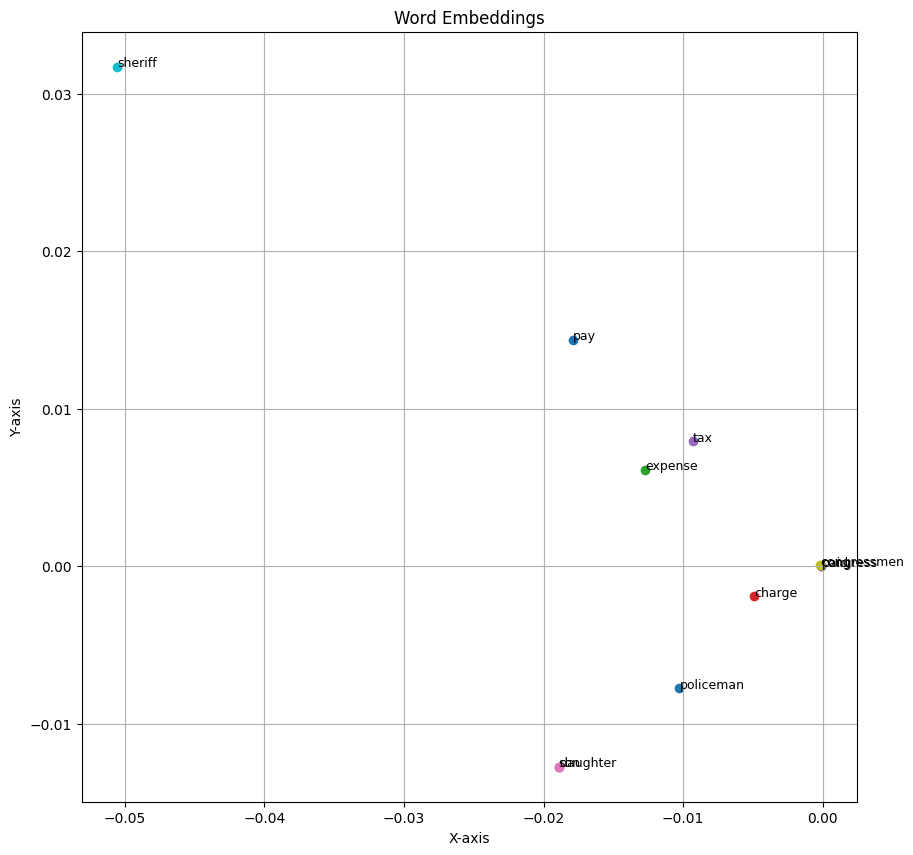

In [11]:
def plot_embeddings(M_reduced, word_to_index, words):
    """
    Plot the 2D embeddings of the words.
    """
    plt.figure(figsize=(10, 10))

    # plot each word as a point in the 2D space
    # and annotate it with the word itself
    for word in words:
        i = word_to_index[word]
        x, y = M_reduced[i]
        plt.scatter(x, y)
        plt.annotate(word, (x, y), fontsize=9)

    plt.title('Word Embeddings')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.grid()
    plt.show()

# select interesting words to plot
words = ['pay', 'paid', 'expense', 'charge', 'tax', 'son', 'daughter', 'congress', 'congressmen', 'sheriff', 'policeman']

plot_embeddings(M_reduced1, word_to_index, words)

## Prediction-Based Word Vectors
In this section, we load pre-trained word vectors using the **GloVe** embeddings from the [Stanford NLP paper on GloVe](https://nlp.stanford.edu/pubs/glove.pdf). The pre-trained embeddings provide rich semantic information about words based on large text corpora, allowing us to represent words as vectors that capture their meaning and relationships.

Steps:
1. **Load GloVe Word Vectors**: We use the GloVe embeddings from the `glove-wiki-gigaword-200` model, which has 200-dimensional vectors for each word.
2. **Vocabulary Matching**: We map the words from our corpus to the GloVe vocabulary and extract the corresponding vectors.
3. **Dimensionality Reduction**: After obtaining the word vectors, we reduce the dimensionality to visualize the embeddings in 2D space, allowing us to explore word relationships visually.

This is an excellent opportunity to explore how pre-trained embeddings like GloVe can be used to improve downstream NLP tasks by providing richer word representations.

In [12]:
# Do not edit
import gensim.downloader as api
import numpy as np
wv_from_bin = api.load("glove-wiki-gigaword-200")
print("Loaded vocab size %i" % len(list(wv_from_bin.index_to_key)))

wv_words = list(wv_from_bin.index_to_key)
unique_tokens = set(tokens)
word2ind = {}
M = []
idx = 0
print('rendering M based on wv')
for w in wv_words:
    try:
        M.append(wv_from_bin.get_vector(w))
        word2ind[w] = idx
        idx += 1
    except:
        pass

print('rendering M based on unique_tokens')
for w in unique_tokens:
    if w in wv_words:
        continue
    try:
        M.append(wv_from_bin.get_vector(w))
        word2ind[w] = idx
        idx += 1
    except:
        pass
M = np.stack(M)
M_reduced = reduce_to_k_dim(M, k=2)

M_lengths = np.linalg.norm(M_reduced, axis=1)
M_reduced_normalized = M_reduced / M_lengths[:, np.newaxis]

Loaded vocab size 400000
rendering M based on wv
rendering M based on unique_tokens


### Compare plots
What stands out when comparing the two different ways of embedding using the given words?

(Use this to help answer the question in your assignment document).

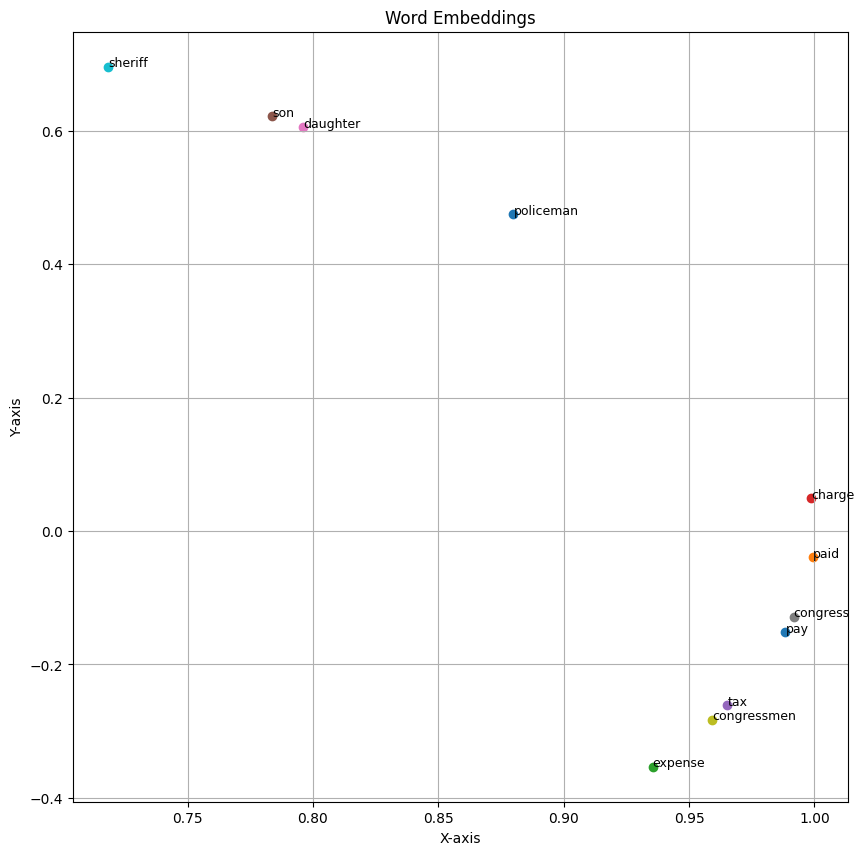

In [13]:
plot_embeddings(M_reduced_normalized, word2ind, words)

From these plots it stands out that words cluster around 0,0 for the first method of embeddings (co-matrix), and words that are semantically similar but not equal may get the same embeddings. These observations do not occur for the second method. Additionally, for the second method words seem to form an ellipse.

### Words with multiple meanings
Polysemes and homonyms are words that have more than one meaning (see [this wiki page](https://en.wikipedia.org/wiki/Polysemy) to learn more about the difference between polysemes and homonyms). Your task is to find a word with at least two different meanings such that the top-10 most similar words (according to cosine similarity) contain related words from both meanings.

For example:
- "leaves" has both the "go_away" and "a_structure_of_a_plant" meanings in the top 10.
- "scoop" has both "handed_waffle_cone" and "lowdown" meanings in the top 10.

You will probably need to try several polysemous or homonymic words before you find one.

Once you discover a word that fits this criterion, state the word and explain the multiple meanings that occur in the top 10. Reflect on why many of the polysemous or homonymic words you tried didn’t work (i.e., why the top-10 most similar words only contain one of the word's meanings).

**Note**: Use the `wv_from_bin.most_similar(word)` function to get the top 10 most similar words. This function ranks all other words in the vocabulary based on their cosine similarity to the given word. For further assistance, you can refer to the [Gensim documentation](https://radimrehurek.com/gensim/models/keyedvectors.html).

In [14]:
wv_from_bin.most_similar('bear', topn=10)
wv_from_bin.most_similar('lie', topn=10)
wv_from_bin.most_similar('break', topn=10)
wv_from_bin.most_similar('light', topn=10)

[('bright', 0.6242774724960327),
 ('dark', 0.6141002178192139),
 ('lights', 0.6013951897621155),
 ('lighter', 0.558175265789032),
 ('heavy', 0.5408364534378052),
 ('sunlight', 0.5362919569015503),
 ('blue', 0.5349379777908325),
 ('colored', 0.5282376408576965),
 ('sky', 0.5239452719688416),
 ('color', 0.513929009437561)]

## Our Findings

We found a few words that fit the criterion: 'bear', 'lie', 'break', and 'light. We will elaborate on the last word: 'light'. The top-10 most similar words are shown above. The word 'light' is often used in two types of context: 1) when something is light in weight (i.e. it is not heavy), 2) when something is light visually (i.e. it is not dark, it is bright). These different context are clearly shown in the top-10 words: it contains both words like 'bright', 'dark' and 'sunlight', as well as the word 'heavy'. The reason that many polysemous or homonymic words did not work is likely because many of these words have one meaning/context that is very prominent in the data, which will therefore dominate the top words. Even though the word technically may have multiple meanings, one meaning is dominant in the literature, so the different meanings are not easily learned.

### Synonyms
When considering **Cosine Similarity**, it's often useful to think of **Cosine Distance**, which is simply 1 - Cosine Similarity.

Find three words \( (w_1, w_2, w_3) \) where:
- \(w_1\) and \(w_2\) are **synonyms**.
- \(w_1\) and \(w_3\) are **antonyms**.

However, you need to find a case where **Cosine Distance** \( (w_1, w_3) < \text{Cosine Distance} (w_1, w_2) \). In other words, the antonym is **closer** to the word than its synonym in the vector space.

For example, "happy" (\(w_1\)) may be closer to "sad" (\(w_3\)) than to "cheerful" (\(w_2\)), which is counter-intuitive since we expect synonyms to be closer than antonyms. 

Once you find such an example, provide a possible explanation for why this result may have occurred.

Use the `wv_from_bin.distance(w1, w2)` function to compute the cosine distance between two words. You can refer to the [Gensim documentation](https://radimrehurek.com/gensim/models/keyedvectors.html) for further assistance.







In [15]:
w1 = 'large'
w2 = 'big'
w3 = 'small'

synonym_dist = wv_from_bin.distance(w1, w2)
antonym_dist = wv_from_bin.distance(w1, w3)

if antonym_dist < synonym_dist:
    print(f"{w1} and {w3} are antonyms, and are closer than {w1} and {w2}, which are synonyms.")

else:
    print("Try again")

print(f"The distance between {w1} and {w2} is {synonym_dist}")
print(f"The distance between {w1} and {w3} is {antonym_dist}")

large and small are antonyms, and are closer than large and big, which are synonyms.
The distance between large and big is 0.3340132236480713
The distance between large and small is 0.1497916579246521


# Our Findings

The antonyms we found that are closer in cosine distance than related synonyms is shown above: 'large', 'small', and 'big'. 

A reason why this result may occur is because the word vectors are learned based on very large corpora, by a model learning relationships between words that are often found together in certain contexts. Even though antonyms are by definition complete opposites, for some antonyms it is very likely that they often occur together in text, perhaps even more than a relevant synonym. This will lead to the embeddings of the antonyms being closer in distance than the synonyms.

In the context of our specific antonyms and synonyms: we can imagine that people often talk about something being large when comparing it to something small, therefore mentioning both antonyms in the same context. In addition, when one has already described something is 'large' they may not be inclined to describe it again using a synonym like 'big'. We think this is the most important reason synonyms may be further in distance than antonyms; synonyms may not be used in the same text very often, since people have already said what they needed to say with the first word, why use another word again?

### Analogies
Word vectors have demonstrated the ability to solve analogies based on their learned semantic relationships. For instance, consider the analogy: 

**"man : grandfather :: woman : x"** 

(Read: man is to grandfather as woman is to x). Using word vectors, we can find the word \(x\) that completes the analogy.

In the example provided, we use the `most_similar` function from the Gensim library. This function identifies words that are most similar to the words in the positive list and most dissimilar to those in the negative list. For analogy solving, it effectively computes:

\[ \text{word}(x) = \text{most similar to} (\text{woman} + \text{grandfather} - \text{man}) \]

The result is the word with the highest cosine similarity to the target vector. You can use this approach to explore various analogies and gain insights into the semantic structure of word vectors.

Refer to the [Gensim documentation](https://radimrehurek.com/gensim/models/keyedvectors.html) for more details on the `most_similar` function and how word vectors handle analogy-solving tasks.

In [16]:
# Run this cell to answer the analogy -- man : grandfather :: woman : x
print(wv_from_bin.most_similar(positive=['woman', 'grandfather'], negative=['man']))

[('grandmother', 0.7608445286750793), ('granddaughter', 0.7200808525085449), ('daughter', 0.7168302536010742), ('mother', 0.7151536345481873), ('niece', 0.7005682587623596), ('father', 0.6659887433052063), ('aunt', 0.6623408794403076), ('grandson', 0.6618767976760864), ('grandparents', 0.644661009311676), ('wife', 0.6445354223251343)]


### Bias in word vectors
a. **Observation**: Consider the results of a word vector model when queried with analogies involving "man", "woman", and "profession". What are the top results returned by the model for each query?

For the analogy man : profession :: woman : x, you get results like 'teaching', 'nursing', 'teacher' at the top.
The other way around, woman : profession :: man : x, you get results like 'skill', 'reputation', 'skills', 'business', 'respected' at the top.

b. **Analysis**: Do you observe any gender biases in the results? For example, are certain professions more closely associated with "man" or "woman" based on the word vectors? Discuss how word embeddings might perpetuate societal biases present in the training data.

Yes, clearly there are gender biases: women are generally associated with caretaking jobs, while men are associated with skillful, leadership roles. This is a clear form of historic societal bias, that may be perpetuated if these types of models are used for every day use applications like search machines. You can imagine that people will (perhaps subconsciously) start to associate males and females with different kinds of jobs, if this is what they see on a daily basis when they are searching online.

c. **Reflection**: How might such biases affect the fairness of machine learning models that use word embeddings? Suggest potential strategies for mitigating gender bias in word vector models.

Whether this bias is fair depends on the aim of a machine learning model. If a model is build specifically to reflect the current societal situation, then maybe this is exactly what the model should be doing, as society simply may have gender biases. However, if we want a machine learning model that is as unbiased as possible, and fair in any use, then using such embeddings can clearly lead to unfair usecases. 

The first step to mitigating any type of bias in a model is always to acknowledge it exists. Eventhough in hindsight it often seems extremely obvious, while building these models, the bias often flies under the radar because it is not the intention of the developers. Then, mitigating gender bias in word vector models should mainly focus on the data these embeddings are trained on. If female and males are often mentioned in different contexts in the data, there is not much the model can do to mitigate this; it is simply learning the context of these words. Thus, if we want to mitigate this bias, we need to make sure our data is representative of our final goal. In conclusion; we need to debias our data. For example, by including data where males and females are swapped in their stereotypical roles, like men as nurses or women as leaders.

In [17]:
print(wv_from_bin.most_similar(positive=['man', 'profession'], negative=['woman']))
print()
print(wv_from_bin.most_similar(positive=['woman', 'profession'], negative=['man']))

[('reputation', 0.5250176787376404), ('professions', 0.5178037881851196), ('skill', 0.49046966433525085), ('skills', 0.49005505442619324), ('ethic', 0.4897659420967102), ('business', 0.4875852167606354), ('respected', 0.485920250415802), ('practice', 0.482104629278183), ('regarded', 0.4778572618961334), ('life', 0.4760662019252777)]

[('professions', 0.5957457423210144), ('practitioner', 0.49884122610092163), ('teaching', 0.48292139172554016), ('nursing', 0.48211804032325745), ('vocation', 0.4788965880870819), ('teacher', 0.47160351276397705), ('practicing', 0.46937814354896545), ('educator', 0.46524327993392944), ('physicians', 0.4628995358943939), ('professionals', 0.4601394236087799)]


# Final Questions

1. **Theoretically and in practice, why is it helpful to represent words as vectors? Based on the 
results you obtained, can you anticipate cases where word vectors would not be helpful to 
determining a word’s meaning? List 1-2 specific examples.**

    It is helpful to represent words as vectors because these vectors can capture semantic meaning. They can tell us something about which contexts these words are often used in, and therefore also capture relationships between words and contexts. As we have seen in the assignment, word vectors do struggle in some specific cases. Because each word is simply represented by 1 vector, thus its meaning has to be reduced to 1 vector. One case where this would not be helpful is if a word has multiple very common meanings (like the word 'light' we discussed in the assignment), one vector can then not tell us exactly what the word means.

2. **Describe the two ways of representing words you implement in the notebook. What stands out 
when comparing these two methods in how they represent words?**

    One way is to simply use the frequency of co-occurrences as word-vectors. A word-vector will then be very sparse (many zeros), and only have non-zero values at the indices of words the word has occurred with in the corpus.
    Another way is to use learned (pretrained) word vectors like the GLoVE embeddings. This method allows word embeddings to be capture more semantic meaning, instead of just reflecting how often words occur together. 
    What stands out when comparing these methods is that many words may cluster around 0,0 for the first method. You can see this for words like 'congress', 'congressmen', and 'paid' which are all plotted at 0,0. Additionally, some words that are semantically similar may receive the exact same embedding, even though they are the exact same word. For example, the words 'son' and 'daughter' are expected to be similar, but not equal, however they receive the exact same embedding in the first method. For the second method, these problems are mitigated. Words do not cluster around one point, but form a sort of ellipse in the 2d space. Word like 'daughter' and 'son' here are close together, but not equal, which makes sense. Words like 'policemand' and 'sheriff' that are somewhat similar but still a little different are very far apart for the first method, while for the second method they are relatively close. In general, the second method therefore seems more effective and realistic in representing words as embeddings.

3. **The code provides simple examples that could be used to evaluate word vectors. Are these 
effective evaluations for the meaning of a word? Why or why not? Give at least one concrete 
example.**

    In the code one way we evaluate the meaning of a word is by looking at the top-k most similar words. Even though we saw this may not always work well (e.g. polysemy), I believe this simple evaluation is effective in most cases. In general, I think it is very useful to look at words that are similar in meaning to a word, to find the meaning of that word. For example, if I want to know what the word 'extravagant' means, one of the first steps I would likely take is to go to a search engine and look up the word, the first thing that pops-up is a definition together with related words. This method is thus quite similar to an everyday method many people likely use once in a while.